# TP1 - Parte B: Classificação de Atividades Humanas 
### Tópicos de Ciência dos Dados - MECD (2022/2023)

### Autores

- Duarte Meneses - 2019216949
- Patricia Costa - 2019213995


In [2]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

## 4.5 e 4.6 da Parte A

### 4.5. ReliefF

In [3]:
from ReliefF import ReliefF

def reliefF(x, y):
    fs = ReliefF(n_features_to_keep=10)
    fs.fit_transform(x, y)

    return fs.top_features[:10]

### 4.6. Fisher Score

In [4]:
from skfeature.function.similarity_based import fisher_score

def fisherScore(x, y):
    return fisher_score.fisher_score(x, y)

## Parte B


### 1.1. Data Splitting

### 1.1.1. Train-Test (TT) e Train-Validation-Test data split

In [5]:
from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

def train_test(data, target, train_size):

    x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=train_size)

    trainTest = {"TRAIN": [x_train, y_train], "TEST": [x_test, y_test]}

    return trainTest

def train_validation_test(data, target, train_size, test_size):

    x_train, x_rem, y_train, y_rem = train_test_split(data, target, train_size=train_size)

    # 1 - train_size -> correponde agora ao nosso 100%(1)
    # test_size -> test_size / (1-train_size)

    test = test_size / (1-train_size)

    x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size = test)

    trainValidation = {"TRAIN": [x_train, y_train], "TEST": [x_test, y_test], "VALIDATION": [x_valid, y_valid]}
    
    return trainValidation



### 1.1.2. K-fold data split

In [6]:
from sklearn.model_selection import KFold
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

def k_fold(x, y, n_splits):
    kf = KFold(n_splits=n_splits, shuffle = True)
    kfold = []
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        kfold.append({"TRAIN": [x_train, y_train], "TEST": [x_test, y_test]})
    
    return kfold

In [7]:
#Testes
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])

print("--Train Test--\n")
trainTest = train_test(X, y, 0.7)
display(trainTest)

print("\n--Train Validation Test--\n")
trainValidation = train_validation_test(X, y, 0.4, 0.3)
display(trainValidation)

print("\n--K Fold--\n")
kFold = k_fold(X, y, 4)
display(kFold)

--Train Test--



{'TRAIN': [array([[3, 4],
         [1, 2]]),
  array([4, 1])],
 'TEST': [array([[3, 4],
         [1, 2]]),
  array([2, 3])]}


--Train Validation Test--



{'TRAIN': [array([[3, 4]]), array([2])],
 'TEST': [array([[3, 4],
         [1, 2]]), array([4, 3])],
 'VALIDATION': [array([[1, 2]]), array([1])]}


--K Fold--



[{'TRAIN': [array([[1, 2],
          [1, 2],
          [3, 4]]),
   array([1, 3, 4])],
  'TEST': [array([[3, 4]]), array([2])]},
 {'TRAIN': [array([[1, 2],
          [3, 4],
          [1, 2]]),
   array([1, 2, 3])],
  'TEST': [array([[3, 4]]), array([4])]},
 {'TRAIN': [array([[1, 2],
          [3, 4],
          [3, 4]]),
   array([1, 2, 4])],
  'TEST': [array([[1, 2]]), array([3])]},
 {'TRAIN': [array([[3, 4],
          [1, 2],
          [3, 4]]),
   array([2, 3, 4])],
  'TEST': [array([[1, 2]]), array([1])]}]

### 1.2. Métricas de exactidação

In [8]:
#Teste
true = [2, 0, 2, 2, 0, 1]
pred = [0, 0, 2, 2, 0, 2]

-> Explicação do parâmetro average

**'binary'**:
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

**'micro'**:
Calculate metrics globally by counting the total true positives, false negatives and false positives.

**'macro'**:
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

**'weighted'**:
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

**'samples'**:
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

,Metrics
Recall,0.666667
Precision,0.555556
F1-score,0.600000


,0,1,2
0,2,0,0
1,0,0,1
2,1,0,2


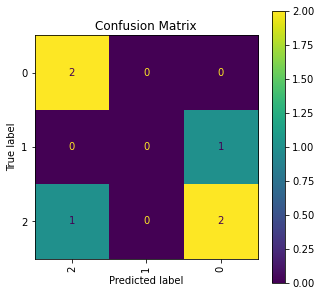

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
from sklearn.metrics import recall_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
from sklearn.metrics import precision_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
from sklearn.metrics import f1_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

def metrics(true, pred, printar = False):
    cm = confusion_matrix(true, pred)
    rs = recall_score(true, pred, average='weighted', zero_division=0)
    ps = precision_score(true, pred, average='weighted', zero_division=0)
    f1 = f1_score(true, pred, average='weighted', zero_division=0)

    if(printar):
        print('Confusion Matrix:\n', cm)
        print('\nRecall: ', rs)
        print('\nPrecision: ', ps)
        print('\nF1-score: ', f1)
        print('-'*50)

    return [cm, rs, ps, f1]

def mais_bonito(cm, rs, ps, f1, labels):

    metricsFrame = pd.DataFrame([rs, ps, f1], columns=['Metrics']).rename(index={0: 'Recall', 1: 'Precision', 2: 'F1-score'})
    display(metricsFrame)

    try:
        cmFrame = pd.DataFrame(cm, columns=labels, index=labels).style.set_caption("Confusion Matrix")
        display(cmFrame)

        cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
        _, ax = plt.subplots(figsize=(5,5))
        cmp.plot(ax=ax)
        ax.set_title("Confusion Matrix")
        ax.xaxis.set_ticklabels(labels)
        ax.xaxis.set_ticklabels(labels[::-1], rotation=90)
        plt.show()

    except:
        cmFrame = pd.DataFrame(cm).style.set_caption("Confusion Matrix")
        display(cmFrame)

cm, rs, ps, f1 = metrics(true, pred)
mais_bonito(cm, rs, ps, f1, [0,1,2])



### 2.1. Dataset

In [10]:
iris = datasets.load_iris()

data = iris.data
target = iris.target

display(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 2.1. k-Nearest Neighbours

In [11]:
from sklearn.neighbors import KNeighborsClassifier

def K_neighbors_classifier(x, y, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x, y)

    return neigh


### 2.1.1. Train-only

,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,50,0
virginica,0,0,50


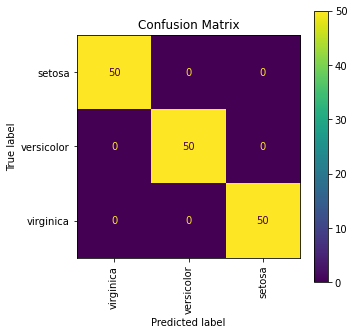

In [12]:
def TO_211(x, y, labels, k):
    neigh = K_neighbors_classifier(x, y, k)
    pred = neigh.predict(x)
    true = y
    cm, rs, ps, f1 = metrics(true, pred)
    
    mais_bonito(cm, rs, ps, f1, labels)

TO_211(data, target, iris["target_names"], 1)

### 2.1.1. TT 70-30

,Metrics
Recall,0.955556
Precision,0.955556
F1-score,0.955556


,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,16,1
virginica,0,1,15


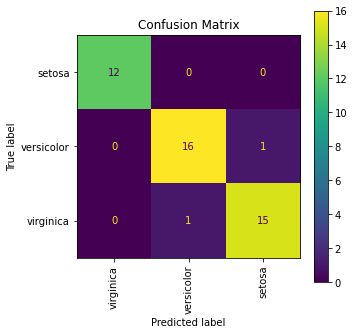

In [13]:
def TT_211(x, y, labels, k):
    trainTest = train_test(x, y, 0.7)
    neigh = K_neighbors_classifier(trainTest['TRAIN'][0], trainTest['TRAIN'][1], k)
    pred = neigh.predict(trainTest['TEST'][0])
    true = trainTest['TEST'][1]
    cm, rs, ps, f1 = metrics(true, pred)
    
    mais_bonito(cm, rs, ps, f1, labels)

TT_211(data, target, iris["target_names"], 1)

### 2.1.1. 10x10-fold cross-validation (10CV)

------------------- Iteração 0 -------------------


,Metrics
Recall,0.933333
Precision,0.966667
F1-score,0.942857


,setosa,versicolor,virginica
setosa,3,0,0
versicolor,0,10,1
virginica,0,0,1


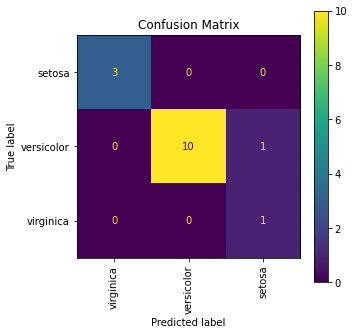

------------------- Iteração 1 -------------------


,Metrics
Recall,0.933333
Precision,0.946667
F1-score,0.933333


,setosa,versicolor,virginica
setosa,6,0,0
versicolor,0,4,1
virginica,0,0,4


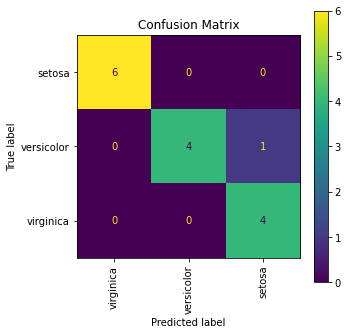

------------------- Iteração 2 -------------------


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,3,0,0
versicolor,0,4,0
virginica,0,0,8


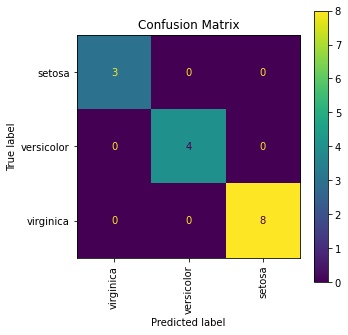

------------------- Iteração 3 -------------------


,Metrics
Recall,0.933333
Precision,0.942857
F1-score,0.933333


,setosa,versicolor,virginica
setosa,2,0,0
versicolor,0,6,1
virginica,0,0,6


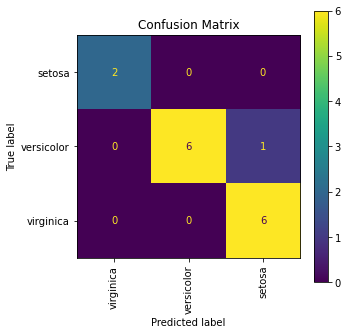

------------------- Iteração 4 -------------------


,Metrics
Recall,0.933333
Precision,0.955556
F1-score,0.935238


,setosa,versicolor,virginica
setosa,9,0,0
versicolor,0,2,0
virginica,0,1,3


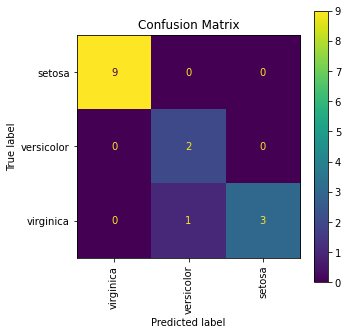

------------------- Iteração 5 -------------------


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,6,0,0
versicolor,0,7,0
virginica,0,0,2


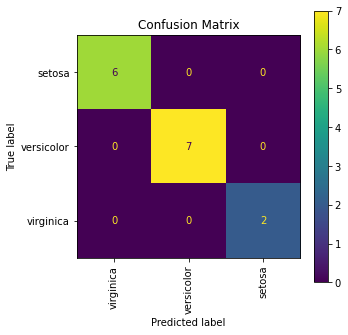

------------------- Iteração 6 -------------------


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,5,0,0
versicolor,0,4,0
virginica,0,0,6


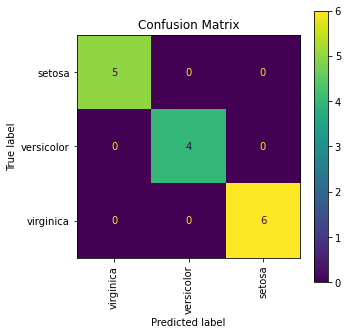

------------------- Iteração 7 -------------------


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,4,0,0
versicolor,0,6,0
virginica,0,0,5


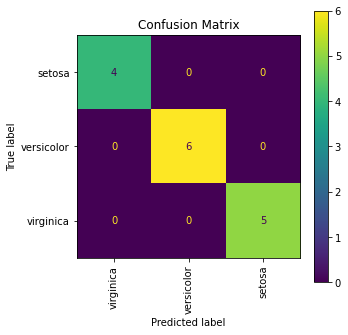

------------------- Iteração 8 -------------------


,Metrics
Recall,0.933333
Precision,0.955556
F1-score,0.937778


,setosa,versicolor,virginica
setosa,5,0,0
versicolor,0,2,0
virginica,0,1,7


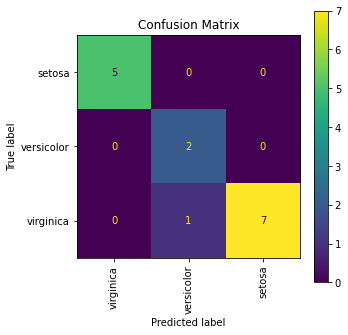

------------------- Iteração 9 -------------------


,Metrics
Recall,0.933333
Precision,0.955556
F1-score,0.936970


,setosa,versicolor,virginica
setosa,7,0,0
versicolor,0,2,0
virginica,0,1,5


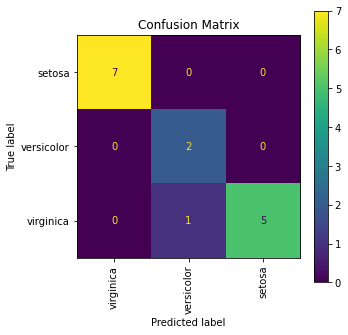

In [14]:
def CV_211(x, y, n_splits, labels, k):
    kf = k_fold(x, y, n_splits)

    count = 0
    for info in kf:
        print("------------------- Iteração " + str(count) + " -------------------")

        neigh = K_neighbors_classifier(info['TRAIN'][0], info['TRAIN'][1], k)
        pred = neigh.predict(info['TEST'][0])
        true = info['TEST'][1]

        cm, rs, ps, f1 = metrics(true, pred)

        mais_bonito(cm, rs, ps, f1, labels)

        count += 1

CV_211(data, target, 10, iris["target_names"], 1)

### 2.1.2. k na gama {1, 3, 5, ...,15}

In [15]:
_k = np.arange(1, 16, 2)

display(_k)

array([ 1,  3,  5,  7,  9, 11, 13, 15])

### 2.1.2. Train-only

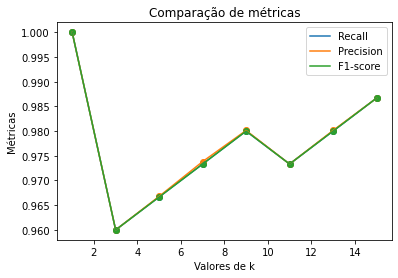

Best K: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,50,0
virginica,0,0,50


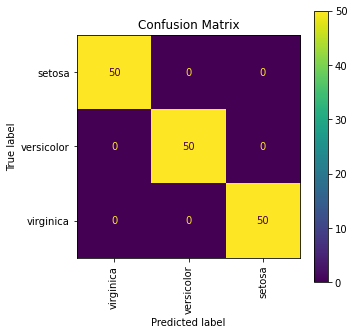

In [16]:
def TO_212(x, y, metr):
    for k in _k:
        neigh = K_neighbors_classifier(x, y, k)
        pred = neigh.predict(x)
        true = y
        cm, rs, ps, f1 = metrics(true, pred)

        metr["Neigh"].append(neigh)
        metr["Recall"].append(rs)
        metr["Precision"].append(ps)
        metr["F1-score"].append(f1)

    return metr

def plot_metricas(metr):
    plt.figure()

    plt.plot(_k, metr["Recall"], label="Recall")
    plt.scatter(_k, metr["Recall"])
    plt.plot(_k, metr["Precision"], label="Precision")
    plt.scatter(_k, metr["Precision"])
    plt.plot(_k, metr["F1-score"], label="F1-score")
    plt.scatter(_k, metr["F1-score"])
    
    
    plt.title("Comparação de métricas")
    plt.xlabel("Valores de k")
    plt.ylabel("Métricas")
    plt.legend()
    plt.show()

def TO_gama(x, y, labels):
    metr = {"Neigh": [], "Recall": [], "Precision": [], "F1-score": []}
    
    new_metr = TO_212(x, y, metr)

    plot_metricas(new_metr)

    pos_k = new_metr["F1-score"].index(max(new_metr["F1-score"]))
    best_k = _k[pos_k]
    print("Best K: " + str(best_k))

    neigh = K_neighbors_classifier(x, y, best_k)
    pred = neigh.predict(x)
    true = y
    cm, rs, ps, f1 = metrics(true, pred)

    mais_bonito(cm, rs, ps, f1, labels)

TO_gama(data, target, iris["target_names"])

### 2.1.2. TVT 40-30-30

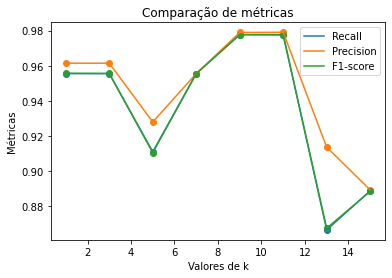

Best K: 9


,Metrics
Recall,0.955556
Precision,0.955556
F1-score,0.955556


,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,9,1
virginica,0,1,21


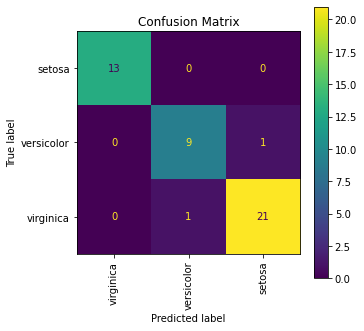

In [17]:
# TODO
# VER O MELHOR K -> FEITO
# PARA O MELHOR K, TESTAR COM O TREINO + VALIDATION JUNTOS, USANDO O TEST COMO PRED


def TVT_212(x, y, metr):
    for k in _k:
        trainValidation = train_validation_test(x, y, 0.4, 0.3)

        neigh = K_neighbors_classifier(trainValidation['TRAIN'][0], trainValidation['TRAIN'][1], k)
        pred = neigh.predict(trainValidation['VALIDATION'][0])
        true = trainValidation['VALIDATION'][1]
        cm, rs, ps, f1 = metrics(true, pred)

        metr["Neigh"].append(neigh)
        metr["Recall"].append(rs)
        metr["Precision"].append(ps)
        metr["F1-score"].append(f1)
    
    return metr

def plot_metricas(metr):
    plt.figure()

    plt.plot(_k, metr["Recall"], label="Recall")
    plt.scatter(_k, metr["Recall"])
    plt.plot(_k, metr["Precision"], label="Precision")
    plt.scatter(_k, metr["Precision"])
    plt.plot(_k, metr["F1-score"], label="F1-score")
    plt.scatter(_k, metr["F1-score"])
    
    plt.title("Comparação de métricas")
    plt.xlabel("Valores de k")
    plt.ylabel("Métricas")
    plt.legend()
    plt.show()

def TVT_gama(x, y, labels):
    metr = {"Neigh": [], "Recall": [], "Precision": [], "F1-score": []}
    
    new_metr = TVT_212(x, y, metr)

    plot_metricas(new_metr)

    pos_k = new_metr["F1-score"].index(max(new_metr["F1-score"]))
    best_k = _k[pos_k]
    print("Best K: " + str(best_k))

    trainValidation = train_validation_test(x, y, 0.4, 0.3)

    newTrain0 = np.concatenate((trainValidation['TRAIN'][0], trainValidation['VALIDATION'][0]), axis=0)
    newTrain1 = np.concatenate((trainValidation['TRAIN'][1], trainValidation['VALIDATION'][1]), axis=0)

    neigh = K_neighbors_classifier(newTrain0, newTrain1, best_k)
    pred = neigh.predict(trainValidation['TEST'][0])
    true = trainValidation['TEST'][1]
    cm, rs, ps, f1 = metrics(true, pred)

    mais_bonito(cm, rs, ps, f1, labels)

TVT_gama(data, target, iris["target_names"])

### 2.1.2. 10x10-fold cross-validation (10CV)

------------------- Iteração 0 -------------------


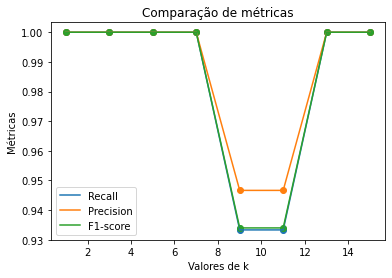

Best K: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,5,0,0
versicolor,0,4,0
virginica,0,0,6


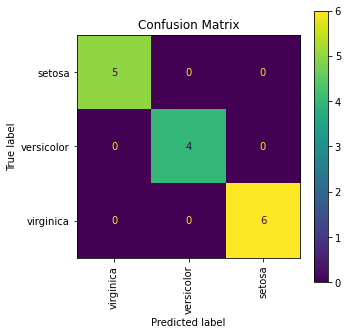

------------------- Iteração 1 -------------------


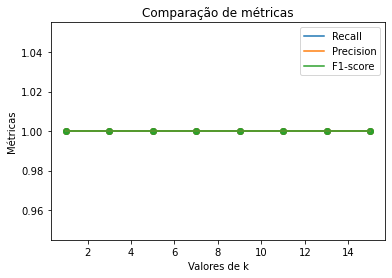

Best K: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,5,0,0
versicolor,0,6,0
virginica,0,0,4


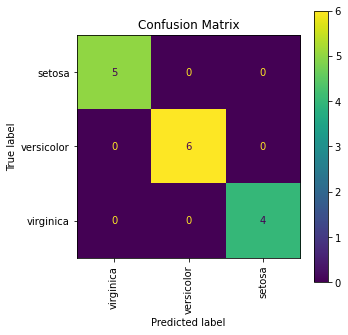

------------------- Iteração 2 -------------------


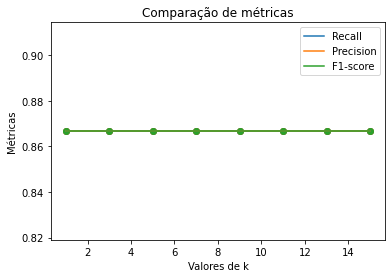

Best K: 1


,Metrics
Recall,0.866667
Precision,0.866667
F1-score,0.866667


,setosa,versicolor,virginica
setosa,6,0,0
versicolor,0,3,1
virginica,0,1,4


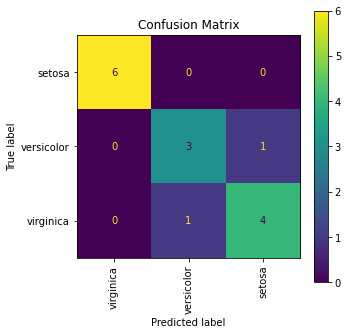

------------------- Iteração 3 -------------------


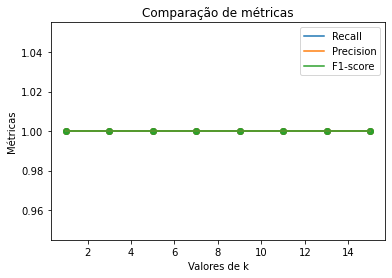

Best K: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,5,0,0
versicolor,0,3,0
virginica,0,0,7


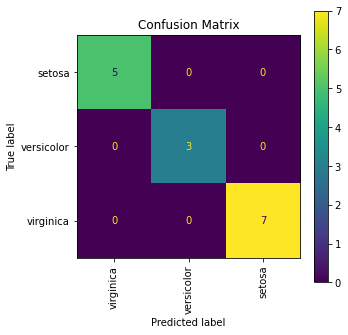

------------------- Iteração 4 -------------------


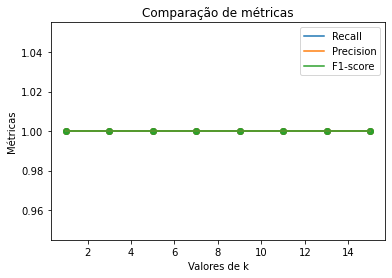

Best K: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,4,0,0
versicolor,0,5,0
virginica,0,0,6


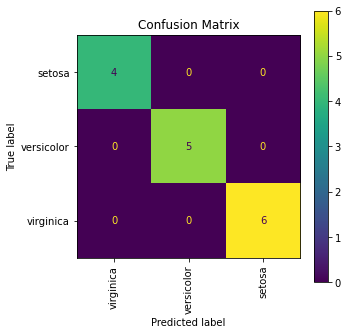

------------------- Iteração 5 -------------------


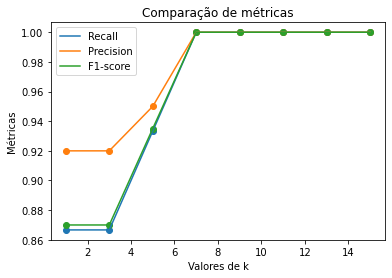

Best K: 7


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,6,0,0
versicolor,0,3,0
virginica,0,0,6


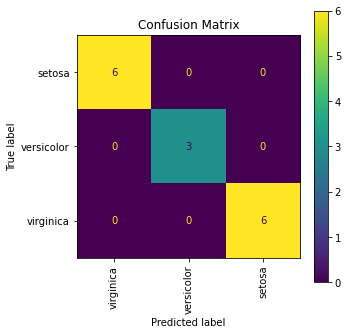

------------------- Iteração 6 -------------------


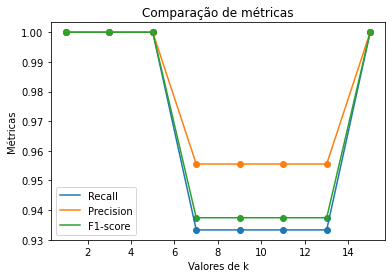

Best K: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,6,0,0
versicolor,0,2,0
virginica,0,0,7


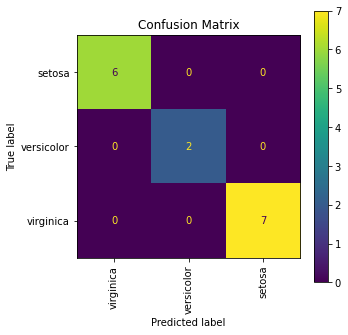

------------------- Iteração 7 -------------------


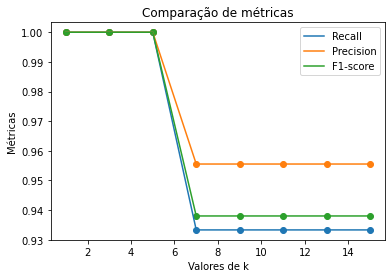

Best K: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,4,0,0
versicolor,0,9,0
virginica,0,0,2


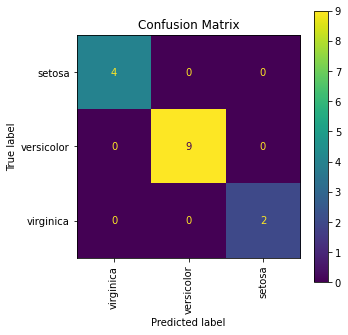

------------------- Iteração 8 -------------------


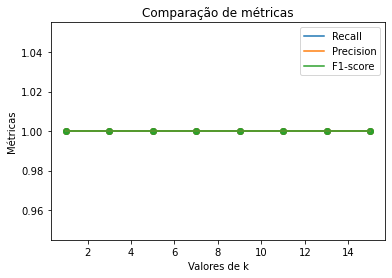

Best K: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,setosa,versicolor,virginica
setosa,3,0,0
versicolor,0,8,0
virginica,0,0,4


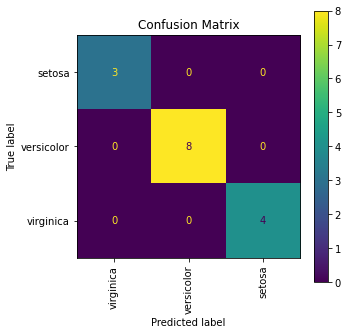

------------------- Iteração 9 -------------------


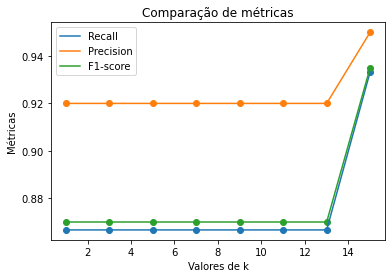

Best K: 15


,Metrics
Recall,0.933333
Precision,0.950000
F1-score,0.935065


,setosa,versicolor,virginica
setosa,6,0,0
versicolor,0,5,1
virginica,0,0,3


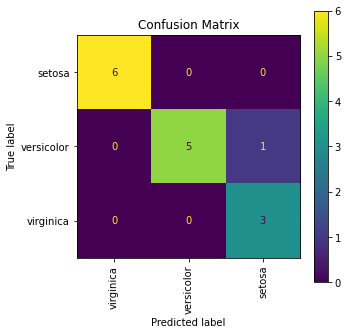

In [18]:
def CV_212(info, metr):
    for k in _k:
        neigh = K_neighbors_classifier(info['TRAIN'][0], info['TRAIN'][1], k)
        pred = neigh.predict(info['TEST'][0])
        true = info['TEST'][1]
        cm, rs, ps, f1 = metrics(true, pred)

        metr["Neigh"].append(neigh)
        metr["Recall"].append(rs)
        metr["Precision"].append(ps)
        metr["F1-score"].append(f1)

    return metr

def plot_metricas(metr):
    plt.figure()

    plt.plot(_k, metr["Recall"], label="Recall")
    plt.scatter(_k, metr["Recall"])
    plt.plot(_k, metr["Precision"], label="Precision")
    plt.scatter(_k, metr["Precision"])
    plt.plot(_k, metr["F1-score"], label="F1-score")
    plt.scatter(_k, metr["F1-score"])
    
    plt.title("Comparação de métricas")
    plt.xlabel("Valores de k")
    plt.ylabel("Métricas")
    plt.legend()
    plt.show()

def CV_gama(x, y, labels):
    
    kf = k_fold(x, y, 10)
    count = 0
    for info in kf:
        metr = {"Neigh": [], "Recall": [], "Precision": [], "F1-score": []}
        print("------------------- Iteração " + str(count) + " -------------------")
        count += 1
        new_metr = CV_212(info, metr)

        plot_metricas(new_metr)

        pos_k = new_metr["F1-score"].index(max(new_metr["F1-score"]))
        best_k = _k[pos_k]
        print("Best K: " + str(best_k))

        neigh = K_neighbors_classifier(info['TRAIN'][0], info['TRAIN'][1], best_k)
        pred = neigh.predict(info['TEST'][0])
        true = info['TEST'][1]
        cm, rs, ps, f1 = metrics(true, pred)

        mais_bonito(cm, rs, ps, f1, labels)

CV_gama(data, target, iris["target_names"])

### 2.2. ReliefF

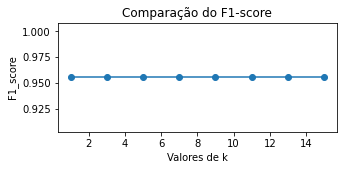

Nr of features: 1
Best K: 1
F1_score: 0.955243664717349
--------------------------------------------------


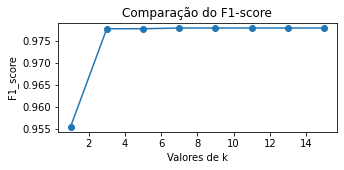

Nr of features: 2
Best K: 7
F1_score: 0.955243664717349
--------------------------------------------------


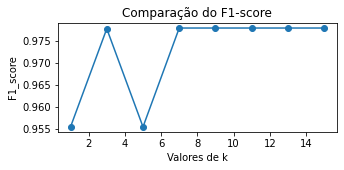

Nr of features: 3
Best K: 7
F1_score: 0.955243664717349
--------------------------------------------------


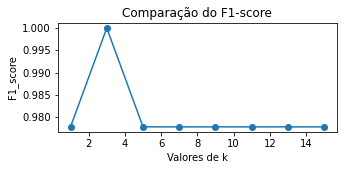

Nr of features: 4
Best K: 3
F1_score: 0.955243664717349
--------------------------------------------------


,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556
Nº of features: 2,0.955556,0.977670,0.977670,0.977831,0.977831,0.977831,0.977831,0.977831
Nº of features: 3,0.955556,0.977670,0.955556,0.977831,0.977831,0.977831,0.977831,0.977831
Nº of features: 4,0.977831,1.000000,0.977831,0.977831,0.977831,0.977831,0.977831,0.977831


In [19]:
def plot_f1(metr_f1):
    plt.figure(figsize=(5,2))

    plt.plot(_k, metr_f1["F1-score"])
    plt.scatter(_k, metr_f1["F1-score"])
    
    plt.title("Comparação do F1-score")
    plt.xlabel("Valores de k")
    plt.ylabel("F1_score")
    plt.show()

def bestkTVT(metr, feat, xTrain, xValidation, trainValidation, s):
    s += 'Nr of features: ' + str(len(feat)) + '\n'
    print('Nr of features: ' + str(len(feat)))
    pos_k = metr["F1-score"].index(max(metr["F1-score"]))
    best_k = _k[pos_k]
    s += "Best K: " + str(best_k) + '\n'
    print("Best K: " + str(best_k))

    newTrain0 = np.concatenate((xTrain, xValidation), axis=0)
    newTrain1 = np.concatenate((trainValidation['TRAIN'][1], trainValidation['VALIDATION'][1]), axis=0)

    neigh = K_neighbors_classifier(newTrain0, newTrain1, best_k)
    xTest = trainValidation['TEST'][0][:,feat]
    pred = neigh.predict(xTest)
    true = trainValidation['TEST'][1]
    cm, rs, ps, f1 = metrics(true, pred)

    s += 'F1_score: ' + str(f1) + '\n' + '-'*50 + '\n'
    print('F1_score: ' + str(f1))
    print('-'*50)

    return f1, s

def repeatTVT(x, y, featselec, num = 4):

    trainValidation = train_validation_test(x, y, 0.4, 0.3)

    f1_score = []
    f1_score_elbow = []
    str_print = ''

    for f in range(num):
        metr = {"F1-score": []}
        feat = featselec[:(f+1)]
        xTrain = trainValidation['TRAIN'][0][:,feat]
        xValidation = trainValidation['VALIDATION'][0][:,feat]

        for k in _k:
            neigh = K_neighbors_classifier(xTrain, trainValidation['TRAIN'][1], k)
            pred = neigh.predict(xValidation)
            true = trainValidation['VALIDATION'][1]
            cm, rs, ps, f1 = metrics(true, pred)

            metr["F1-score"].append(f1)
        f1_score.append(metr["F1-score"])

        #------------Plot F1-Score--------------------------
        plot_f1(metr)

        #------------Best k--------------------------
        aux, str_print = bestkTVT(metr, feat, xTrain, xValidation, trainValidation, str_print)
        f1_score_elbow.append(aux)

    label = ['Nº of features: ' + str(i+1) for i in range(len(featselec))]
    col = ['k=' + str(i) for i in _k]
    df = pd.DataFrame(f1_score, columns = col, index = label)
    display(df)

    return f1_score_elbow, df, str_print
        

f1_score_elbow, df223, str_print = repeatTVT(data, target, reliefF(data, target))

### 2.2.2 Elbow graph

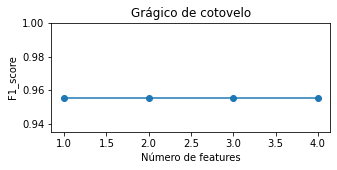

In [20]:
def elbowGraph(lista_f1, num):
    index = np.arange(1,num)

    plt.figure(figsize=(5,2))
    plt.ylim(min(lista_f1)-0.02,1)

    plt.plot(index, lista_f1)
    plt.scatter(index, lista_f1)
    
    plt.title("Grágico de cotovelo")
    plt.xlabel("Número de features")
    plt.ylabel("F1_score")
    plt.show()

elbowGraph(f1_score_elbow, 5)

### 2.2.3. Validation set results

In [21]:
display(df223)

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556
Nº of features: 2,0.955556,0.977670,0.977670,0.977831,0.977831,0.977831,0.977831,0.977831
Nº of features: 3,0.955556,0.977670,0.955556,0.977831,0.977831,0.977831,0.977831,0.977831
Nº of features: 4,0.977831,1.000000,0.977831,0.977831,0.977831,0.977831,0.977831,0.977831


### 2.2.4. Test set results

In [22]:
print(str_print)

Nr of features: 1
Best K: 1
F1_score: 0.955243664717349
--------------------------------------------------
Nr of features: 2
Best K: 7
F1_score: 0.955243664717349
--------------------------------------------------
Nr of features: 3
Best K: 7
F1_score: 0.955243664717349
--------------------------------------------------
Nr of features: 4
Best K: 3
F1_score: 0.955243664717349
--------------------------------------------------



### 2.3. Fisher Score

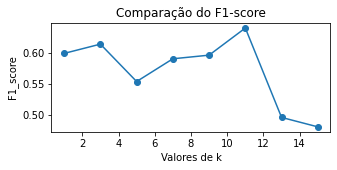

Nr of features: 1
Best K: 11
F1_score: 0.5030106824279506
--------------------------------------------------


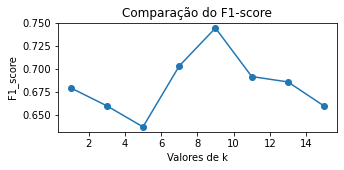

Nr of features: 2
Best K: 9
F1_score: 0.8
--------------------------------------------------


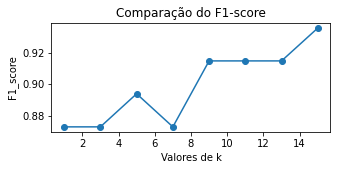

Nr of features: 3
Best K: 15
F1_score: 0.9777062086240831
--------------------------------------------------


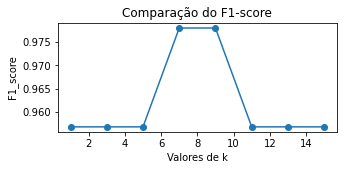

Nr of features: 4
Best K: 7
F1_score: 0.9555555555555556
--------------------------------------------------


,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.598727,0.613534,0.553773,0.590118,0.595915,0.639259,0.496455,0.481368
Nº of features: 2,0.679365,0.659639,0.636614,0.703216,0.744729,0.691669,0.685728,0.659380
Nº of features: 3,0.872807,0.872807,0.893844,0.872807,0.914747,0.914747,0.914747,0.935656
Nº of features: 4,0.956720,0.956720,0.956720,0.978104,0.978104,0.956720,0.956720,0.956720


In [23]:
score = fisherScore(data, target)

f1_score_elbow, df223, str_print = repeatTVT(data, target, score)


### 2.3.2. Elbow Graph

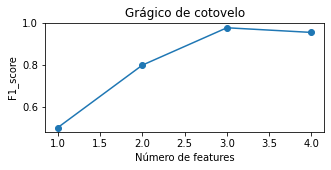

In [24]:
elbowGraph(f1_score_elbow, 5)

### 2.3.3. Validation set results

In [25]:
display(df223)

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.598727,0.613534,0.553773,0.590118,0.595915,0.639259,0.496455,0.481368
Nº of features: 2,0.679365,0.659639,0.636614,0.703216,0.744729,0.691669,0.685728,0.659380
Nº of features: 3,0.872807,0.872807,0.893844,0.872807,0.914747,0.914747,0.914747,0.935656
Nº of features: 4,0.956720,0.956720,0.956720,0.978104,0.978104,0.956720,0.956720,0.956720


### 2.3.4. Test set results

In [26]:
print(str_print)

Nr of features: 1
Best K: 11
F1_score: 0.5030106824279506
--------------------------------------------------
Nr of features: 2
Best K: 9
F1_score: 0.8
--------------------------------------------------
Nr of features: 3
Best K: 15
F1_score: 0.9777062086240831
--------------------------------------------------
Nr of features: 4
Best K: 7
F1_score: 0.9555555555555556
--------------------------------------------------



### 2.4. Class imbalance

 'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
irisDF = pd.DataFrame(iris.data, columns=iris["feature_names"])
irisDF["target"] = iris["target"]
setosa = irisDF[irisDF["target"] == 0]
versicolor = irisDF[irisDF["target"] == 1].sample(30)
virginica = irisDF[irisDF["target"] == 2].sample(10)
new_iris = pd.concat([setosa, versicolor, virginica], axis=0)
new_iris.groupby("target").count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,50,50,50,50
1,30,30,30,30
2,10,10,10,10


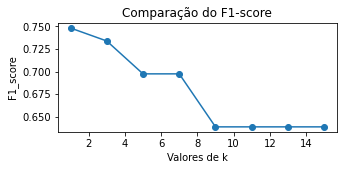

Nr of features: 1
Best K: 1
F1_score: 0.6412345679012346
--------------------------------------------------


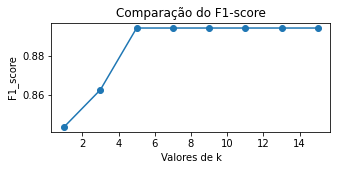

Nr of features: 2
Best K: 5
F1_score: 0.7060730764434469
--------------------------------------------------


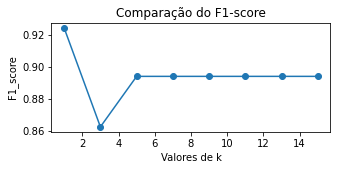

Nr of features: 3
Best K: 1
F1_score: 0.9618800086636343
--------------------------------------------------


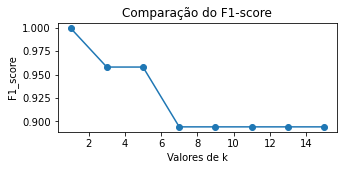

Nr of features: 4
Best K: 1
F1_score: 0.9618800086636343
--------------------------------------------------


,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.748243,0.733894,0.697531,0.697531,0.638889,0.638889,0.638889,0.638889
Nº of features: 2,0.843415,0.862462,0.894180,0.894180,0.894180,0.894180,0.894180,0.894180
Nº of features: 3,0.924544,0.862462,0.894180,0.894180,0.894180,0.894180,0.894180,0.894180
Nº of features: 4,1.000000,0.958215,0.958215,0.894180,0.894180,0.894180,0.894180,0.894180


In [28]:
aux_data = np.array(new_iris.drop(columns=["target"]))
aux_target = np.array(new_iris["target"])

score = fisherScore(aux_data, aux_target)

newIris_elbow, df224, str_print = repeatTVT(aux_data, aux_target, score)

### 2.4.2. Elbow Graph

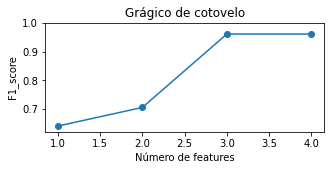

In [29]:
elbowGraph(newIris_elbow, 5)

### 2.4.3. Validation set results

In [30]:
display(df224)

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.748243,0.733894,0.697531,0.697531,0.638889,0.638889,0.638889,0.638889
Nº of features: 2,0.843415,0.862462,0.894180,0.894180,0.894180,0.894180,0.894180,0.894180
Nº of features: 3,0.924544,0.862462,0.894180,0.894180,0.894180,0.894180,0.894180,0.894180
Nº of features: 4,1.000000,0.958215,0.958215,0.894180,0.894180,0.894180,0.894180,0.894180


### 2.4.4. Test set results

In [31]:
print(str_print)

Nr of features: 1
Best K: 1
F1_score: 0.6412345679012346
--------------------------------------------------
Nr of features: 2
Best K: 5
F1_score: 0.7060730764434469
--------------------------------------------------
Nr of features: 3
Best K: 1
F1_score: 0.9618800086636343
--------------------------------------------------
Nr of features: 4
Best K: 1
F1_score: 0.9618800086636343
--------------------------------------------------



### 3. ReliefF for dataset of human activity

In [32]:
activities = np.array(['Stand', 'Sit', 'Sit and Talk', 'Walk', 'Walk and Talk', 'Climb Stair (up/down)',
    'Climb Stair (up/down) and talk', 'Stand -> Sit', 'Sit -> Stand', 'Stand -> Sit and talk', 'Sit -> Stand and talk',
    'Stand -> walk', 'Walk -> stand', 'Stand -> climb stairs (up/down)(and talk)', 'Climb stairs (up/down) -> walk',
    'Climb stairs (up/down) and talk -> walk and talk'])
    
Acc_features = pd.read_csv("dataset/Acc_features.csv").drop(columns='Unnamed: 0')
Gyr_features = pd.read_csv("dataset/Gyr_features.csv").drop(columns=['Unnamed: 0','Label'])
Mag_features = pd.read_csv("dataset/Mag_features.csv").drop(columns=['Unnamed: 0', 'Label'])

new_data = pd.concat([Acc_features, Gyr_features, Mag_features], axis=1)
new_data.to_csv('features.csv', encoding='utf-8')
display(new_data)

new_target = np.array(new_data["Label"])
feature_data = np.array(new_data.drop(columns = ["Label"]))

,Label,Acc X Mean,Acc X Median,Acc X Std,Acc X Variance,Acc X RMS,Acc X AD,Acc X Skew,Acc X Kurtosis,Acc X IQR,...,Mag Z acc Z Corr,Mag X gyr X Corr,Mag X gyr Y Corr,Mag X gyr Z Corr,Mag Y gyr X Corr,Mag Y gyr Y Corr,Mag Y gyr Z Corr,Mag Z gyr X Corr,Mag Z gyr Y Corr,Mag Z gyr Z Corr
0,Stand,2.816928,2.81290,0.081657,0.006668,2.818100,-0.000820,0.104070,0.486731,0.084675,...,0.538935,0.288415,-0.039466,-0.261845,0.319700,-0.137996,-0.320163,-0.608719,0.247963,0.599854
1,Stand,2.864813,2.86200,0.088376,0.007810,2.866162,0.001941,-0.237104,-0.098164,0.135050,...,0.844737,-0.477185,-0.213984,0.385307,-0.190807,-0.281080,0.065046,0.434173,0.272281,-0.243218
2,Stand,2.646591,2.80950,0.347139,0.120506,2.669039,-0.011722,-0.984057,-0.323593,0.464225,...,-0.773026,-0.399344,-0.234917,0.380753,0.428215,0.272995,-0.462982,0.414267,0.233638,-0.398286
3,Stand,2.212950,2.09150,0.285796,0.081679,2.231149,-0.008253,0.830326,-0.620484,0.455650,...,-0.662408,0.547276,0.405573,-0.486648,-0.267835,-0.202777,0.193784,-0.513572,-0.399738,0.459841
4,Stand,2.058188,2.05515,0.102485,0.010503,2.060713,0.001548,0.153356,0.366587,0.133325,...,0.120578,-0.024781,-0.101842,-0.099390,-0.099077,-0.049309,-0.077035,0.184977,0.288267,0.136665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,Climb stairs (up/down) and talk -> walk and talk,-2.100210,-2.19370,0.641578,0.411623,2.195101,-0.003014,0.470363,-0.706343,0.992650,...,-0.018973,0.118220,0.258170,-0.052384,0.068988,0.407538,0.036470,0.223724,-0.114251,0.030868
14484,Climb stairs (up/down) and talk -> walk and talk,3.425963,4.08130,1.693263,2.867140,3.817886,-0.035674,-1.723238,2.626517,1.417625,...,-0.726469,-0.551289,0.193614,0.176818,-0.063941,-0.482605,-0.523068,0.652333,-0.212316,-0.115947
14485,Climb stairs (up/down) and talk -> walk and talk,2.307871,2.18690,1.030087,1.061080,2.525261,0.024127,0.010703,0.621858,0.955350,...,0.189340,-0.394748,-0.056330,0.030090,0.067419,0.096801,0.058462,0.371020,0.462721,0.366293
14486,Climb stairs (up/down) and talk -> walk and talk,1.404052,1.36710,0.719179,0.517218,1.575915,0.010513,-0.280569,0.222744,0.997815,...,0.072190,0.190854,0.447516,0.256721,0.279052,0.443746,0.507358,-0.002371,-0.630569,-0.392307


### 3.1.1. Train-only

,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,Stand,Sit,Sit and Talk,Walk,Walk and Talk,Climb Stair (up/down),Climb Stair (up/down) and talk,Stand -> Sit,Sit -> Stand,Stand -> Sit and talk,Sit -> Stand and talk,Stand -> walk,Walk -> stand,Stand -> climb stairs (up/down)(and talk),Climb stairs (up/down) -> walk,Climb stairs (up/down) and talk -> walk and talk
Stand,1724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sit,0,830,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sit and Talk,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
Walk,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0
Walk and Talk,0,0,0,0,1620,0,0,0,0,0,0,0,0,0,0,0
Climb Stair (up/down),0,0,0,0,0,78,0,0,0,0,0,0,0,0,0,0
Climb Stair (up/down) and talk,0,0,0,0,0,0,76,0,0,0,0,0,0,0,0,0
Stand -> Sit,0,0,0,0,0,0,0,1561,0,0,0,0,0,0,0,0
Sit -> Stand,0,0,0,0,0,0,0,0,2917,0,0,0,0,0,0,0
Stand -> Sit and talk,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0


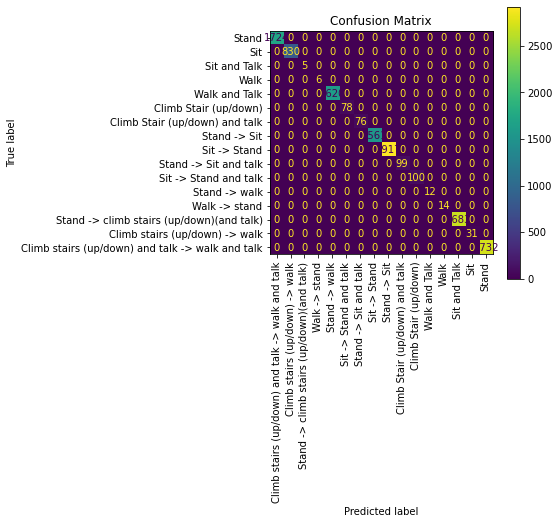

In [33]:
TO_211(feature_data, new_target, activities, 1)

### 3.1.1. TT 70-30

,Metrics
Recall,0.535312
Precision,0.532642
F1-score,0.533559


,Stand,Sit,Sit and Talk,Walk,Walk and Talk,Climb Stair (up/down),Climb Stair (up/down) and talk,Stand -> Sit,Sit -> Stand,Stand -> Sit and talk,Sit -> Stand and talk,Stand -> walk,Walk -> stand,Stand -> climb stairs (up/down)(and talk),Climb stairs (up/down) -> walk,Climb stairs (up/down) and talk -> walk and talk
Stand,171,65,0,0,0,0,1,0,2,1,2,1,1,127,0,124
Sit,64,40,0,1,0,1,1,0,0,0,1,0,0,71,0,61
Sit and Talk,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Walk,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
Walk and Talk,0,0,0,0,345,0,0,146,0,2,2,0,0,0,0,0
Climb Stair (up/down),6,1,0,0,0,3,2,0,11,1,2,0,0,6,0,2
Climb Stair (up/down) and talk,1,0,0,0,0,0,1,1,8,3,1,0,0,5,1,4
Stand -> Sit,0,0,0,0,131,1,0,327,2,6,4,0,0,0,0,0
Sit -> Stand,2,0,0,0,0,10,10,4,823,2,1,1,0,11,12,6
Stand -> Sit and talk,4,1,0,0,5,2,0,7,1,1,2,0,0,2,0,1


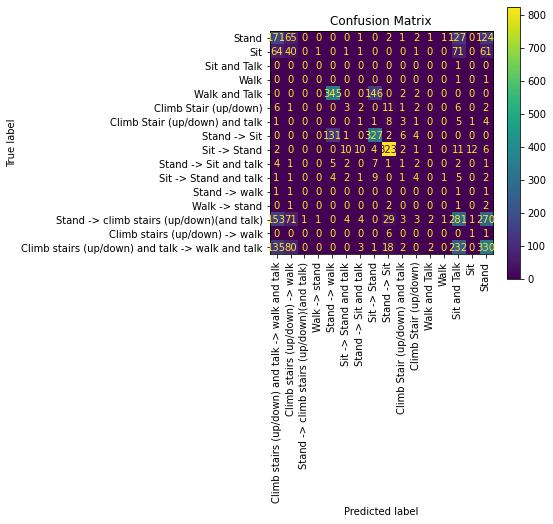

In [34]:
TT_211(feature_data, new_target, activities, 1)

### 3.1.1. 10x10-fold cross-validation (10CV)

------------------- Iteração 0 -------------------


,Metrics
Recall,0.542443
Precision,0.543572
F1-score,0.542760


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,70,19,0,0,0,1,0,1,0,2,1,0,50,0,53
1,32,13,0,0,0,0,0,1,0,0,1,0,17,0,20
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,112,0,0,47,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,2,0,0,0,0,1,0,1
5,0,0,0,0,1,0,0,5,0,0,0,0,3,0,0
6,0,0,0,42,0,0,98,1,0,0,0,0,0,0,0
7,1,0,0,1,2,5,0,275,0,2,1,0,5,1,7
8,0,0,0,0,1,0,4,0,0,1,0,0,0,0,0
9,0,0,0,1,0,1,2,0,0,2,0,0,1,0,0


------------------- Iteração 1 -------------------


,Metrics
Recall,0.552795
Precision,0.547336
F1-score,0.549480


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,52,23,0,0,0,0,0,0,0,1,1,0,48,0,39
1,22,9,0,0,0,0,0,0,0,1,0,0,23,0,21
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,125,0,0,34,0,0,0,0,0,0,0
5,0,0,0,0,0,2,0,0,5,0,0,0,0,0,1
6,1,0,0,0,0,2,0,0,4,0,0,0,2,0,0
7,0,0,0,0,35,0,0,120,3,0,4,0,0,0,0
8,1,0,0,0,0,3,1,1,279,1,0,0,0,4,2
9,0,1,0,0,5,1,1,3,1,1,1,0,0,0,0


------------------- Iteração 2 -------------------


,Metrics
Recall,0.568668
Precision,0.560347
F1-score,0.563500


,Stand,Sit,Sit and Talk,Walk,Walk and Talk,Climb Stair (up/down),Climb Stair (up/down) and talk,Stand -> Sit,Sit -> Stand,Stand -> Sit and talk,Sit -> Stand and talk,Stand -> walk,Walk -> stand,Stand -> climb stairs (up/down)(and talk),Climb stairs (up/down) -> walk,Climb stairs (up/down) and talk -> walk and talk
Stand,59,15,0,1,0,0,0,0,0,0,2,0,0,36,0,46
Sit,26,4,0,1,0,0,0,0,0,1,0,0,0,26,0,32
Sit and Talk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Walk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Walk and Talk,0,0,0,0,128,0,0,46,0,0,0,0,0,0,0,0
Climb Stair (up/down),0,1,0,1,1,2,1,0,3,0,3,0,0,1,0,0
Climb Stair (up/down) and talk,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1
Stand -> Sit,0,0,0,0,41,0,0,114,0,0,1,0,0,0,0,1
Sit -> Stand,0,0,0,0,0,2,3,0,283,0,0,0,0,4,1,1
Stand -> Sit and talk,1,1,0,0,1,0,1,2,0,2,2,0,0,3,0,0


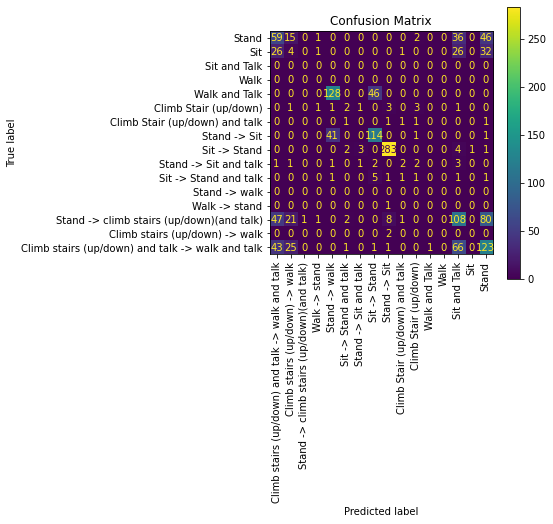

------------------- Iteração 3 -------------------


,Metrics
Recall,0.534852
Precision,0.534967
F1-score,0.533027


,Stand,Sit,Sit and Talk,Walk,Walk and Talk,Climb Stair (up/down),Climb Stair (up/down) and talk,Stand -> Sit,Sit -> Stand,Stand -> Sit and talk,Sit -> Stand and talk,Stand -> walk,Walk -> stand,Stand -> climb stairs (up/down)(and talk),Climb stairs (up/down) -> walk,Climb stairs (up/down) and talk -> walk and talk
Stand,54,18,1,0,0,0,0,0,0,1,0,0,0,48,0,46
Sit,22,7,0,0,0,0,2,0,0,0,0,0,0,30,0,26
Sit and Talk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Walk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Walk and Talk,0,0,0,0,118,0,0,46,0,1,1,0,0,0,0,0
Climb Stair (up/down),1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0
Climb Stair (up/down) and talk,1,0,0,0,0,1,1,0,2,1,0,0,0,3,0,0
Stand -> Sit,0,0,0,0,36,0,0,121,2,0,1,0,0,1,0,0
Sit -> Stand,0,2,0,0,0,3,3,1,255,0,0,0,0,5,0,4
Stand -> Sit and talk,0,0,0,0,0,0,0,2,0,4,2,0,0,4,0,1


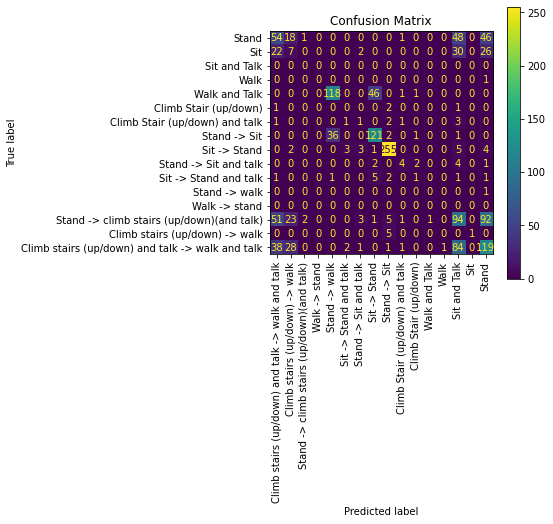

------------------- Iteração 4 -------------------


,Metrics
Recall,0.518979
Precision,0.524384
F1-score,0.520779


,Stand,Sit,Sit and Talk,Walk,Walk and Talk,Climb Stair (up/down),Climb Stair (up/down) and talk,Stand -> Sit,Sit -> Stand,Stand -> Sit and talk,Sit -> Stand and talk,Stand -> walk,Walk -> stand,Stand -> climb stairs (up/down)(and talk),Climb stairs (up/down) -> walk,Climb stairs (up/down) and talk -> walk and talk
Stand,64,20,1,1,0,1,0,0,1,2,1,2,1,54,0,44
Sit,16,5,0,0,0,0,0,0,0,0,0,0,0,22,0,25
Sit and Talk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Walk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Walk and Talk,0,0,0,0,98,0,1,52,0,2,2,0,0,0,0,0
Climb Stair (up/down),1,0,0,0,0,1,3,0,0,0,2,0,0,0,0,0
Climb Stair (up/down) and talk,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1
Stand -> Sit,0,0,0,0,35,0,0,110,0,1,2,0,0,0,0,0
Sit -> Stand,2,0,0,0,0,3,4,0,279,1,0,0,0,3,3,4
Stand -> Sit and talk,1,0,0,0,2,0,0,4,1,1,2,0,0,0,0,2


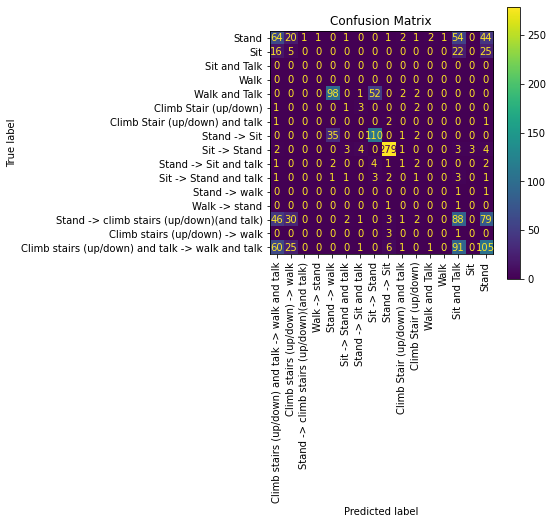

------------------- Iteração 5 -------------------


,Metrics
Recall,0.561077
Precision,0.549823
F1-score,0.554942


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,69,14,0,0,0,0,0,0,0,0,55,0,35
1,20,13,0,0,0,0,0,0,0,0,27,0,29
2,0,0,131,0,0,40,0,1,1,0,0,0,0
3,1,0,0,0,2,0,4,0,1,0,2,0,0
4,1,0,0,0,0,0,2,1,0,0,1,1,3
5,0,0,41,0,0,140,0,2,1,0,0,0,0
6,1,0,0,2,1,0,264,0,2,0,5,2,3
7,0,0,2,0,0,3,1,0,2,0,0,0,2
8,0,1,3,0,0,4,0,0,2,0,1,0,1
9,1,0,0,0,0,0,0,0,0,0,2,0,0


------------------- Iteração 6 -------------------


,Metrics
Recall,0.536922
Precision,0.536081
F1-score,0.536006


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,65,19,0,0,1,0,0,0,0,1,0,0,41,0,46
1,14,14,0,0,2,0,0,0,0,0,0,0,19,0,29
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,105,0,0,43,0,1,2,0,0,0,0,0
4,0,0,0,0,0,0,0,7,0,0,0,0,1,0,1
5,0,0,0,0,0,0,0,4,1,0,0,0,2,0,1
6,1,0,0,32,0,0,103,0,0,4,0,0,1,0,0
7,4,0,0,0,7,0,0,272,0,1,0,0,4,4,4
8,1,1,0,2,0,0,1,0,0,0,0,1,3,0,1
9,0,0,0,0,1,0,1,0,1,2,0,0,0,0,1


------------------- Iteração 7 -------------------


,Metrics
Recall,0.547964
Precision,0.553504
F1-score,0.549754


,Stand,Sit,Sit and Talk,Walk,Walk and Talk,Climb Stair (up/down),Climb Stair (up/down) and talk,Stand -> Sit,Sit -> Stand,Stand -> Sit and talk,Sit -> Stand and talk,Stand -> walk,Walk -> stand,Stand -> climb stairs (up/down)(and talk),Climb stairs (up/down) -> walk,Climb stairs (up/down) and talk -> walk and talk
Stand,64,25,0,1,0,1,0,0,1,0,0,1,0,38,0,33
Sit,20,12,0,0,0,0,0,0,0,0,0,1,0,33,0,17
Sit and Talk,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Walk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Walk and Talk,0,0,0,0,97,0,0,41,0,0,3,0,0,0,0,0
Climb Stair (up/down),1,1,0,0,0,1,0,0,5,0,0,0,0,1,0,0
Climb Stair (up/down) and talk,1,1,0,0,0,1,0,0,3,0,1,0,0,1,0,2
Stand -> Sit,0,0,0,0,37,1,0,115,0,0,2,0,0,1,0,0
Sit -> Stand,0,0,0,0,0,4,2,1,276,0,1,0,0,4,5,2
Stand -> Sit and talk,0,1,0,0,0,0,0,0,1,4,0,0,0,0,0,1


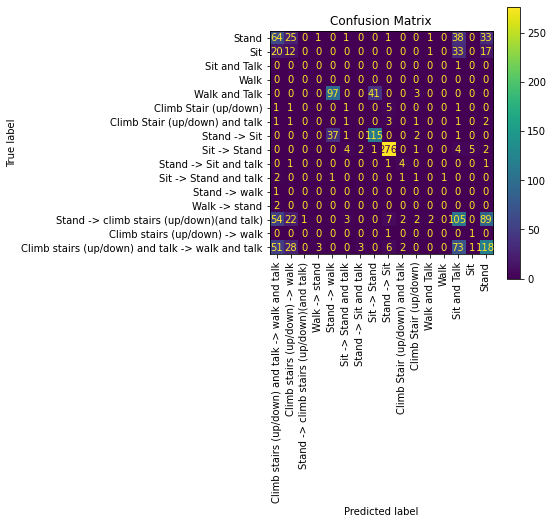

------------------- Iteração 8 -------------------


,Metrics
Recall,0.536602
Precision,0.539874
F1-score,0.537117


,Stand,Sit,Sit and Talk,Walk,Walk and Talk,Climb Stair (up/down),Climb Stair (up/down) and talk,Stand -> Sit,Sit -> Stand,Stand -> Sit and talk,Sit -> Stand and talk,Stand -> walk,Walk -> stand,Stand -> climb stairs (up/down)(and talk),Climb stairs (up/down) -> walk,Climb stairs (up/down) and talk -> walk and talk
Stand,52,23,0,0,0,0,2,0,0,0,0,0,1,54,0,40
Sit,29,10,1,0,0,0,0,0,1,0,1,0,0,21,0,29
Sit and Talk,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
Walk,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Walk and Talk,0,0,0,0,124,0,0,49,0,1,0,0,0,0,0,0
Climb Stair (up/down),1,0,0,0,0,0,2,0,2,0,1,0,0,1,0,1
Climb Stair (up/down) and talk,0,1,0,0,0,0,1,0,3,0,0,0,0,0,1,1
Stand -> Sit,0,0,0,0,33,0,0,118,0,1,0,0,0,0,0,1
Sit -> Stand,0,0,0,0,0,5,4,1,264,0,0,0,0,7,2,5
Stand -> Sit and talk,2,0,0,0,1,0,0,2,1,2,0,0,0,1,0,1


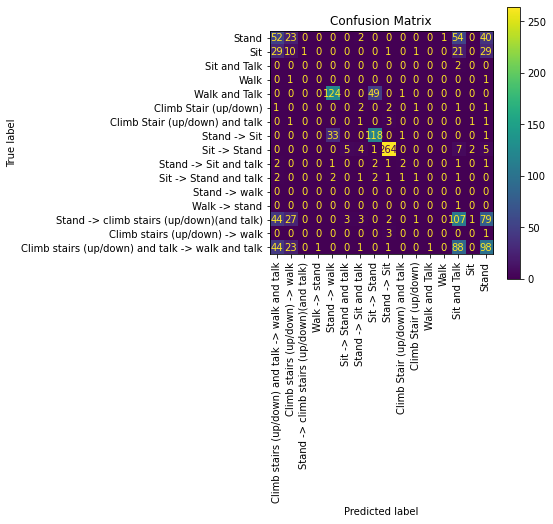

------------------- Iteração 9 -------------------


,Metrics
Recall,0.569061
Precision,0.569559
F1-score,0.568716


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,58,22,0,0,0,1,0,1,1,0,0,0,38,0,41
1,21,19,0,0,0,0,0,1,1,0,0,0,21,0,20
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,121,0,0,44,1,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,3,0,0,0,0,1,0,0
5,1,0,0,0,0,1,0,2,1,0,0,0,1,0,0
6,0,0,0,31,1,0,123,1,2,0,0,0,0,0,0
7,0,1,0,0,1,2,2,281,1,0,0,0,7,3,2
8,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0
9,0,1,0,0,0,0,3,1,3,0,0,0,3,0,1


In [35]:
CV_211(feature_data, new_target, 10, activities, 1)

### 3.1.2. Train-only

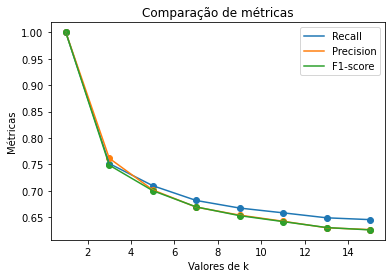

Best K: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


,Stand,Sit,Sit and Talk,Walk,Walk and Talk,Climb Stair (up/down),Climb Stair (up/down) and talk,Stand -> Sit,Sit -> Stand,Stand -> Sit and talk,Sit -> Stand and talk,Stand -> walk,Walk -> stand,Stand -> climb stairs (up/down)(and talk),Climb stairs (up/down) -> walk,Climb stairs (up/down) and talk -> walk and talk
Stand,1724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sit,0,830,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sit and Talk,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
Walk,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0
Walk and Talk,0,0,0,0,1620,0,0,0,0,0,0,0,0,0,0,0
Climb Stair (up/down),0,0,0,0,0,78,0,0,0,0,0,0,0,0,0,0
Climb Stair (up/down) and talk,0,0,0,0,0,0,76,0,0,0,0,0,0,0,0,0
Stand -> Sit,0,0,0,0,0,0,0,1561,0,0,0,0,0,0,0,0
Sit -> Stand,0,0,0,0,0,0,0,0,2917,0,0,0,0,0,0,0
Stand -> Sit and talk,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0


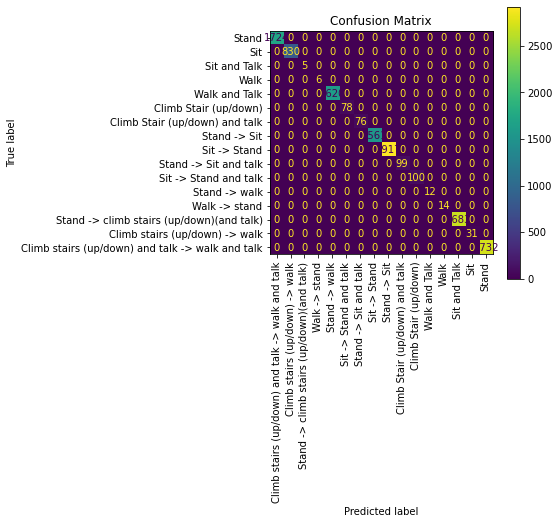

In [36]:
TO_gama(feature_data, new_target, activities)

### 3.1.2. TVT 40-30-30

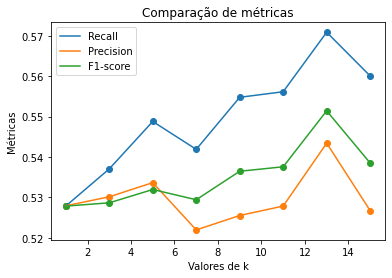

Best K: 13


,Metrics
Recall,0.573039
Precision,0.543264
F1-score,0.554044


,Stand,Sit,Sit and Talk,Walk,Walk and Talk,Climb Stair (up/down),Climb Stair (up/down) and talk,Stand -> Sit,Sit -> Stand,Stand -> Sit and talk,Sit -> Stand and talk,Stand -> walk,Walk -> stand,Stand -> climb stairs (up/down)(and talk),Climb stairs (up/down) -> walk,Climb stairs (up/down) and talk -> walk and talk
Stand,236,12,0,0,0,1,0,0,0,0,0,0,0,138,0,112
Sit,95,7,0,0,0,1,0,0,0,0,0,0,0,77,0,71
Sit and Talk,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
Walk,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1
Walk and Talk,0,0,0,0,326,0,0,163,2,0,0,0,0,0,0,0
Climb Stair (up/down),3,0,0,0,0,1,0,0,14,0,1,0,0,2,0,1
Climb Stair (up/down) and talk,2,0,0,0,0,0,0,1,11,0,0,0,0,6,0,1
Stand -> Sit,0,0,0,0,114,0,0,331,4,1,0,0,0,1,0,0
Sit -> Stand,3,0,0,0,5,2,1,6,832,0,0,0,0,9,0,3
Stand -> Sit and talk,2,2,0,0,4,0,1,8,1,0,1,0,0,6,0,3


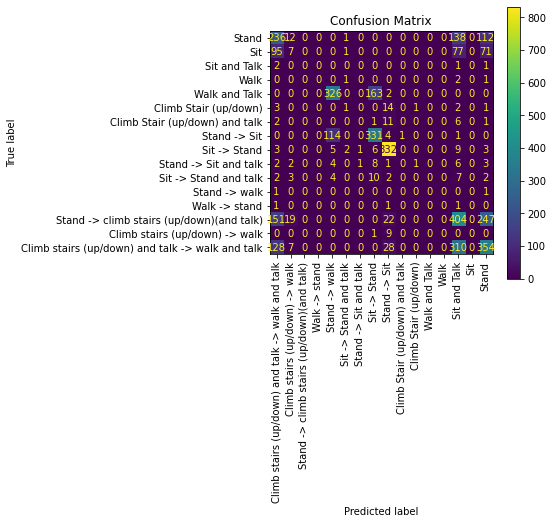

In [37]:
TVT_gama(feature_data, new_target, activities)

### 3.1.2. 10x10-fold cross-validation (10CV)

------------------- Iteração 0 -------------------


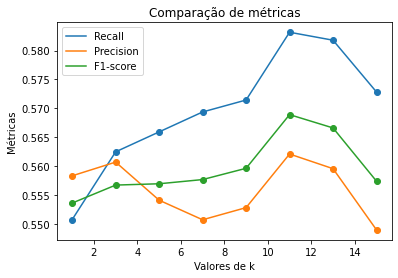

Best K: 11


,Metrics
Recall,0.583161
Precision,0.562079
F1-score,0.568899


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,73,8,0,0,0,0,0,0,1,0,0,0,54,41
1,25,5,0,0,0,0,0,0,0,0,0,0,33,19
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,113,0,0,46,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,4,0,0,0,0,0,0
5,1,0,0,0,1,0,0,1,0,0,0,0,1,0
6,0,0,0,37,0,0,124,3,0,0,0,0,0,0
7,0,0,0,0,1,0,0,284,0,0,0,0,3,2
8,0,0,0,4,0,0,4,0,0,0,0,0,1,1
9,0,1,0,0,1,0,4,0,1,0,0,0,3,1


------------------- Iteração 1 -------------------


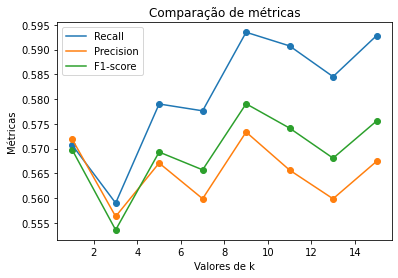

Best K: 9


,Metrics
Recall,0.593513
Precision,0.573352
F1-score,0.579062


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,78,9,0,0,0,0,0,0,0,0,0,0,55,0,37
1,18,5,0,0,0,0,0,0,0,0,0,0,26,0,18
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,121,0,0,52,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,5,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,1,3,0,0,1,0,1
7,0,0,0,0,35,0,0,104,0,0,0,0,0,0,0
8,1,0,0,0,1,1,0,1,287,0,0,0,4,0,0
9,1,1,0,0,0,1,0,5,2,0,0,0,2,0,0


------------------- Iteração 2 -------------------


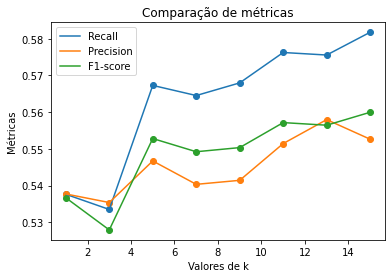

Best K: 15


,Metrics
Recall,0.581781
Precision,0.552619
F1-score,0.559968


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,88,3,0,0,0,0,0,0,0,0,37,0,38
1,33,2,0,0,0,0,0,0,2,0,22,0,21
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,93,0,0,51,1,0,0,0,0,0
4,0,0,0,0,0,0,0,5,0,0,0,0,0
5,2,0,0,0,0,0,0,5,0,0,1,0,2
6,0,0,0,34,0,0,123,7,2,0,0,0,0
7,2,0,0,1,0,0,0,279,0,0,1,0,0
8,1,0,0,2,0,0,1,0,0,0,1,0,1
9,3,0,0,0,0,0,4,0,0,0,1,0,1


------------------- Iteração 3 -------------------


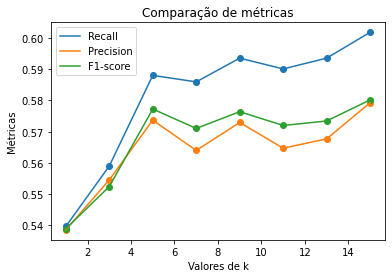

Best K: 15


,Metrics
Recall,0.601794
Precision,0.579272
F1-score,0.580163


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,84,3,0,0,0,0,0,0,0,0,0,44,0,41
1,42,3,0,0,0,0,0,0,0,0,0,16,0,32
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,106,0,0,37,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,4,0,0,0,2,0,0
5,1,0,0,0,0,0,0,3,0,0,0,3,0,0
6,0,0,0,24,0,0,115,4,0,0,0,0,0,0
7,0,0,0,0,0,0,0,286,0,0,0,2,0,1
8,2,1,0,2,2,0,3,1,0,0,0,1,0,0
9,2,0,0,1,0,0,1,3,0,1,0,5,0,0


------------------- Iteração 4 -------------------


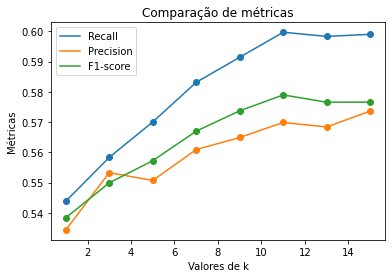

Best K: 11


,Metrics
Recall,0.599724
Precision,0.569876
F1-score,0.578980


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,78,8,0,0,0,0,0,0,0,0,0,36,0,29
1,36,6,0,0,0,0,0,0,0,0,0,26,0,31
2,0,0,124,0,0,46,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,5,1,0,0,0,0,0,0
4,0,0,0,0,0,0,6,1,0,0,0,2,0,1
5,0,0,43,0,0,111,3,0,0,0,0,0,0,0
6,1,0,1,0,0,0,296,0,0,0,0,5,0,0
7,0,2,1,1,0,2,0,2,1,0,0,2,0,1
8,0,0,1,0,0,7,2,0,0,0,0,2,0,0
9,1,0,0,0,0,0,1,0,0,0,0,1,0,0


------------------- Iteração 5 -------------------


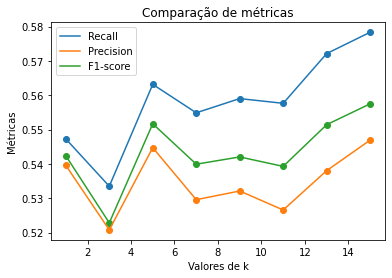

Best K: 15


,Metrics
Recall,0.578330
Precision,0.546914
F1-score,0.557482


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,90,2,0,0,0,0,0,0,0,0,0,39,0,50
1,33,2,0,0,0,0,0,0,0,0,0,33,0,21
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,116,0,0,59,1,0,0,0,0,0,0
4,2,0,0,0,0,0,0,3,0,0,0,1,0,0
5,0,0,0,0,0,0,0,6,1,0,0,1,0,0
6,0,0,0,36,0,0,114,3,0,0,0,0,0,0
7,1,0,0,1,0,0,1,245,1,0,0,2,0,1
8,0,0,0,2,0,0,1,1,0,1,0,1,0,0
9,1,0,0,1,0,0,4,2,1,0,0,2,0,0


------------------- Iteração 6 -------------------


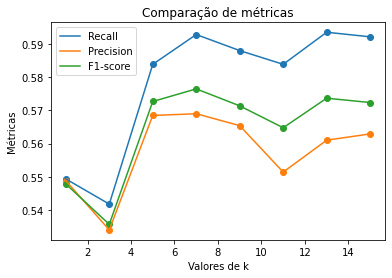

Best K: 7


,Metrics
Recall,0.592823
Precision,0.568967
F1-score,0.576455


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,89,4,0,0,0,0,0,0,0,0,52,0,40
1,27,4,0,0,0,0,1,0,0,0,19,0,21
2,0,0,119,1,0,45,0,0,1,0,0,0,0
3,2,0,0,0,0,0,6,1,1,0,2,0,0
4,1,0,0,0,1,0,2,0,0,0,0,0,1
5,0,0,57,1,0,123,2,0,0,0,0,0,0
6,0,0,1,0,0,1,292,0,0,0,2,0,4
7,0,0,3,0,0,1,2,1,0,0,4,0,1
8,0,1,0,0,0,6,0,0,1,0,2,0,0
9,2,0,0,0,0,0,0,0,0,0,1,0,0


------------------- Iteração 7 -------------------


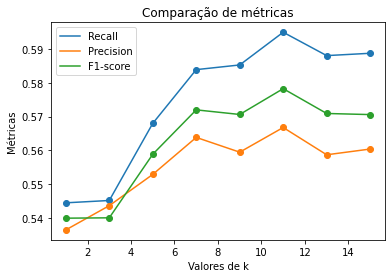

Best K: 11


,Metrics
Recall,0.594893
Precision,0.566761
F1-score,0.578228


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,66,10,0,0,0,0,0,0,0,0,46,0,45
1,25,3,0,0,0,0,0,0,0,0,28,0,16
2,0,0,121,0,0,43,2,0,0,0,0,0,0
3,2,0,0,0,1,1,4,0,0,0,3,0,0
4,1,0,1,0,0,0,8,0,0,0,0,0,0
5,0,0,30,0,0,100,1,0,0,0,1,0,0
6,2,0,0,0,0,0,300,0,0,0,2,0,3
7,2,0,0,0,2,3,0,1,0,0,0,0,0
8,0,0,1,0,0,4,0,1,0,0,2,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0


------------------- Iteração 8 -------------------


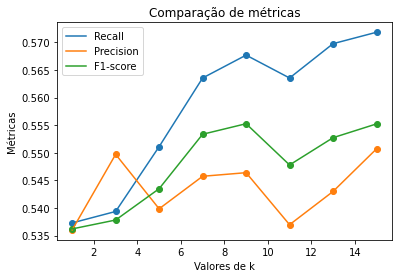

Best K: 9


,Metrics
Recall,0.567680
Precision,0.546389
F1-score,0.555257


,Stand,Sit,Sit and Talk,Walk,Walk and Talk,Climb Stair (up/down),Climb Stair (up/down) and talk,Stand -> Sit,Sit -> Stand,Stand -> Sit and talk,Sit -> Stand and talk,Stand -> walk,Walk -> stand,Stand -> climb stairs (up/down)(and talk),Climb stairs (up/down) -> walk,Climb stairs (up/down) and talk -> walk and talk
Stand,72,15,0,0,0,0,0,0,0,1,0,0,0,48,0,35
Sit,23,6,0,0,0,0,0,0,0,0,0,0,0,26,0,30
Sit and Talk,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Walk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Walk and Talk,0,0,0,0,109,0,0,49,0,0,0,0,0,0,0,0
Climb Stair (up/down),0,1,0,0,0,2,0,0,3,0,0,0,0,1,0,0
Climb Stair (up/down) and talk,0,1,0,0,0,0,0,0,7,0,0,0,0,0,0,1
Stand -> Sit,0,0,0,0,41,0,0,108,1,2,0,0,0,1,0,0
Sit -> Stand,0,0,0,0,2,2,0,1,291,0,0,0,0,7,0,1
Stand -> Sit and talk,1,0,0,0,1,0,2,1,0,0,1,0,0,1,0,2


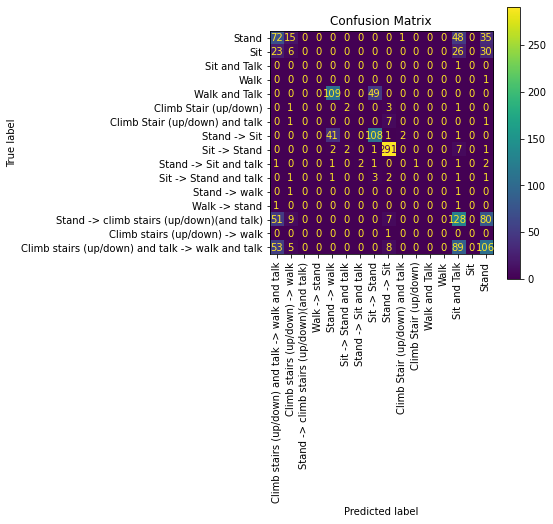

------------------- Iteração 9 -------------------


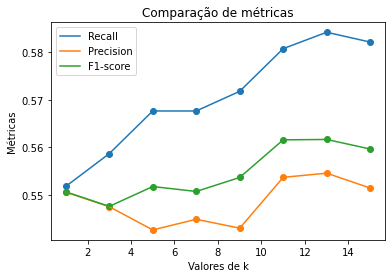

Best K: 13


,Metrics
Recall,0.584254
Precision,0.554586
F1-score,0.561682


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,79,3,0,0,0,0,0,0,0,0,0,0,47,0,46
1,45,4,0,0,0,0,0,0,0,0,0,0,28,0,14
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,112,0,0,49,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,11,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,3,0,0,0,4,0,0
7,0,0,0,0,35,0,0,132,3,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,292,0,0,0,1,0,0
9,0,0,0,0,0,1,0,5,3,0,0,0,2,0,1


In [38]:
CV_gama(feature_data, new_target, activities)

### 3.2. ReliefF

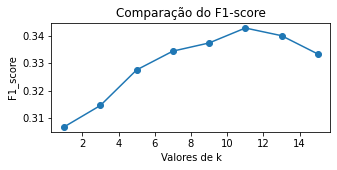

Nr of features: 1
Best K: 11
F1_score: 0.35009258549037325
--------------------------------------------------


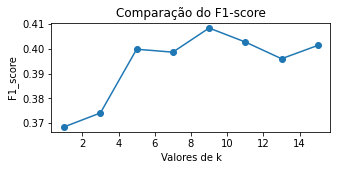

Nr of features: 2
Best K: 9
F1_score: 0.39689063805771785
--------------------------------------------------


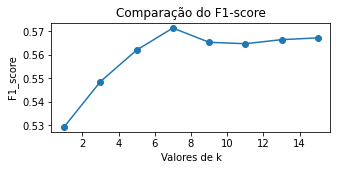

Nr of features: 3
Best K: 7
F1_score: 0.5640794552569868
--------------------------------------------------


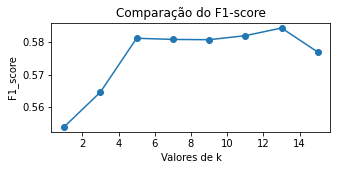

Nr of features: 4
Best K: 13
F1_score: 0.5852502456654869
--------------------------------------------------


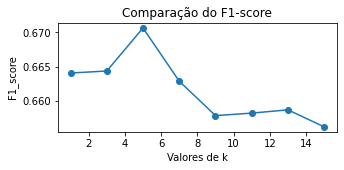

Nr of features: 5
Best K: 5
F1_score: 0.6843329390481858
--------------------------------------------------


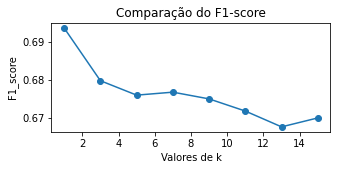

Nr of features: 6
Best K: 1
F1_score: 0.7035271781698853
--------------------------------------------------


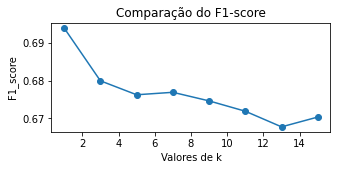

Nr of features: 7
Best K: 1
F1_score: 0.7029979997137307
--------------------------------------------------


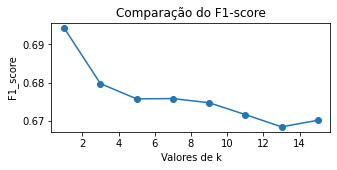

Nr of features: 8
Best K: 1
F1_score: 0.7034604381888592
--------------------------------------------------


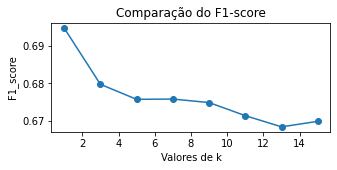

Nr of features: 9
Best K: 1
F1_score: 0.7036899895987224
--------------------------------------------------


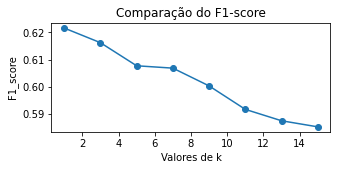

Nr of features: 10
Best K: 1
F1_score: 0.6318598797733285
--------------------------------------------------


,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.306764,0.314560,0.327513,0.334361,0.337333,0.342777,0.339984,0.333317
Nº of features: 2,0.368551,0.374161,0.399894,0.398709,0.408452,0.402804,0.396054,0.401437
Nº of features: 3,0.529372,0.548634,0.562070,0.571463,0.565386,0.564782,0.566508,0.567263
Nº of features: 4,0.553884,0.564605,0.581217,0.580857,0.580769,0.582012,0.584374,0.576946
Nº of features: 5,0.664061,0.664356,0.670647,0.662868,0.657828,0.658193,0.658671,0.656181
Nº of features: 6,0.693813,0.679812,0.675976,0.676767,0.674975,0.671741,0.667545,0.669920
Nº of features: 7,0.694017,0.680003,0.676297,0.676952,0.674671,0.671926,0.667778,0.670384
Nº of features: 8,0.694268,0.679781,0.675796,0.675868,0.674781,0.671697,0.668496,0.670211
Nº of features: 9,0.694714,0.679781,0.675796,0.675868,0.674938,0.671465,0.668496,0.669965
Nº of features: 10,0.621612,0.616209,0.607691,0.606818,0.600268,0.591612,0.587413,0.585166


In [39]:
newActivity_elbow, df3, str_print = repeatTVT(feature_data,new_target, reliefF(feature_data, new_target), 10)

### 3.2. Elbow Graph

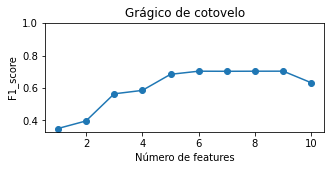

In [40]:
elbowGraph(newActivity_elbow, 11)

### 3.3. Validation set results

In [41]:
display(df3)

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.306764,0.314560,0.327513,0.334361,0.337333,0.342777,0.339984,0.333317
Nº of features: 2,0.368551,0.374161,0.399894,0.398709,0.408452,0.402804,0.396054,0.401437
Nº of features: 3,0.529372,0.548634,0.562070,0.571463,0.565386,0.564782,0.566508,0.567263
Nº of features: 4,0.553884,0.564605,0.581217,0.580857,0.580769,0.582012,0.584374,0.576946
Nº of features: 5,0.664061,0.664356,0.670647,0.662868,0.657828,0.658193,0.658671,0.656181
Nº of features: 6,0.693813,0.679812,0.675976,0.676767,0.674975,0.671741,0.667545,0.669920
Nº of features: 7,0.694017,0.680003,0.676297,0.676952,0.674671,0.671926,0.667778,0.670384
Nº of features: 8,0.694268,0.679781,0.675796,0.675868,0.674781,0.671697,0.668496,0.670211
Nº of features: 9,0.694714,0.679781,0.675796,0.675868,0.674938,0.671465,0.668496,0.669965
Nº of features: 10,0.621612,0.616209,0.607691,0.606818,0.600268,0.591612,0.587413,0.585166


### 3.4. Test set results

In [42]:
print(str_print)

Nr of features: 1
Best K: 11
F1_score: 0.35009258549037325
--------------------------------------------------
Nr of features: 2
Best K: 9
F1_score: 0.39689063805771785
--------------------------------------------------
Nr of features: 3
Best K: 7
F1_score: 0.5640794552569868
--------------------------------------------------
Nr of features: 4
Best K: 13
F1_score: 0.5852502456654869
--------------------------------------------------
Nr of features: 5
Best K: 5
F1_score: 0.6843329390481858
--------------------------------------------------
Nr of features: 6
Best K: 1
F1_score: 0.7035271781698853
--------------------------------------------------
Nr of features: 7
Best K: 1
F1_score: 0.7029979997137307
--------------------------------------------------
Nr of features: 8
Best K: 1
F1_score: 0.7034604381888592
--------------------------------------------------
Nr of features: 9
Best K: 1
F1_score: 0.7036899895987224
--------------------------------------------------
Nr of features: 10
Best 

### 4. Neural net

In [44]:
from sklearn.neural_network import MLPClassifier

dataTVT = train_validation_test(feature_data, new_target, 0.4, 0.3)

def plot_f1(metr, neur_evol):
    plt.figure()

    plt.plot(neur_evol, metr, label="f1")
    plt.scatter(neur_evol, metr)
    
    plt.title("Evolução do f1-score")
    plt.xlabel("Número de neurónios")
    plt.ylabel("f1-score")
    plt.show()

### 4.1. Fixed learning speed

In [45]:
from sklearn.preprocessing import StandardScaler  

def mlp_4(type_speed):
    nns = []
    metrF1 = []

    scaler = StandardScaler() 
    scaler.fit(dataTVT["TRAIN"][0])
    dataTVT["TRAIN"][0] = scaler.transform(dataTVT["TRAIN"][0]) 
    dataTVT["TEST"][0] = scaler.transform(dataTVT["TEST"][0])  
    neur_evol = np.arange(5, 100, 5)

    for i in neur_evol:
        if type_speed == 'fixed':
            clf = MLPClassifier(activation='logistic', learning_rate='constant', solver='sgd', hidden_layer_sizes=i, max_iter=1000)
        elif type_speed == 'variable':
            clf = MLPClassifier(activation='logistic', learning_rate='invscaling', solver='sgd', hidden_layer_sizes=i, max_iter=1000)
        else:
             clf = MLPClassifier(activation='logistic', learning_rate='constant', hidden_layer_sizes=i, max_iter=1000, solver='sgd', momentum=0.5)
        
        nns.append(clf.fit(dataTVT["TRAIN"][0], dataTVT["TRAIN"][1]))

        pred = clf.predict(dataTVT["VALIDATION"][0])

        true = dataTVT['VALIDATION'][1]
        
        cm, rs, ps, f1 = metrics(true, pred)

        metrF1.append(f1)

    plot_f1(metrF1, neur_evol)

    print("Best neurons number: " + str(neur_evol[np.argmax(metrF1)]))

    best_nns = nns[np.argmax(metrF1)]
    pred = best_nns.predict(dataTVT["TEST"][0])
    true = dataTVT['TEST'][1]
    cm, rs, ps, f1 = metrics(true, pred)
    mais_bonito(cm, rs, ps, f1, activities)

mlp_4('fixed')


c:\Users\emanu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\emanu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\emanu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\emanu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\emanu\anaconda3\lib\site-packages\sklearn\neural_network\_m

### 4.2. Variable learning speed

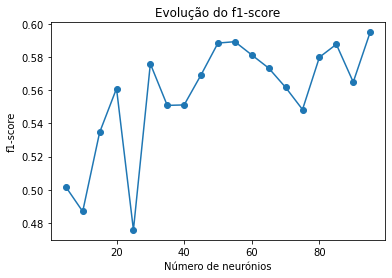

Best neurons number: 95


,Metrics
Recall,0.610996
Precision,0.600139
F1-score,0.591485


,Stand,Sit,Sit and Talk,Walk,Walk and Talk,Climb Stair (up/down),Climb Stair (up/down) and talk,Stand -> Sit,Sit -> Stand,Stand -> Sit and talk,Sit -> Stand and talk,Stand -> walk,Walk -> stand,Stand -> climb stairs (up/down)(and talk),Climb stairs (up/down) -> walk,Climb stairs (up/down) and talk -> walk and talk
Stand,260,0,0,0,0,0,0,0,0,0,1,0,0,128,0,109
Sit,108,2,0,0,0,0,0,0,0,1,2,0,0,91,0,56
Sit and Talk,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
Walk,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
Walk and Talk,0,0,0,0,410,0,0,45,0,1,0,0,0,0,0,0
Climb Stair (up/down),3,2,0,0,0,0,1,0,12,0,1,0,0,2,0,3
Climb Stair (up/down) and talk,4,0,0,0,0,1,2,0,14,1,0,0,0,2,0,3
Stand -> Sit,0,0,0,0,63,0,0,424,0,3,0,0,0,0,0,0
Sit -> Stand,3,0,0,0,0,2,4,2,854,1,0,0,0,18,0,8
Stand -> Sit and talk,0,1,0,0,3,0,1,8,0,2,4,0,0,3,0,5


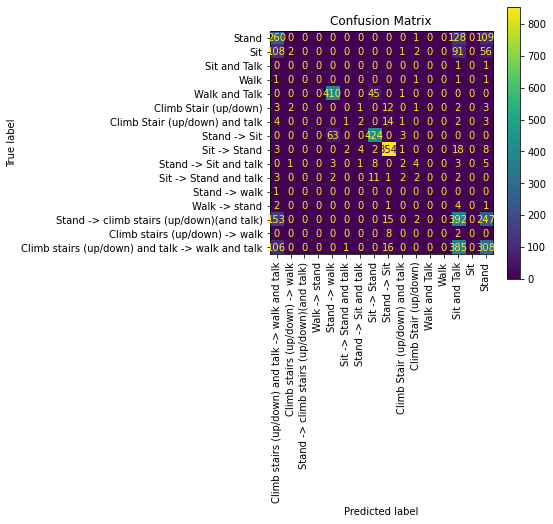

In [ ]:
mlp_4('variable')

### 4.3. Momentum coeficient

In [ ]:
mlp_4('momentum')

NameError: name 'mlp_4' is not defined